In [1]:
%cd ..

/home/pcallens/music-parameters-estimation


In [2]:
import pandas as pd
from utils.acoustic_utils import *
from subprocess import call


Bad key "text.kerning_factor" on line 4 in
/home/pcallens/miniconda3/envs/kerasenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Plot and clean RIR dataset

In [20]:
rir_dir = 'datasets/final_ds/Train/RIR_final/'

In [25]:
def analyse_rir_dir(rir_dir,plot = True):
    rir_dataset = pd.DataFrame(columns = ['RIR_name','t60','c50','drr'])
    for rir_file in tqdm(glob.glob(rir_dir + '*')):
        rir_sr , rir = wavfile.read(rir_file)
        name = os.path.basename(rir_file)
        t60 = t60_impulse_avg(rir,rir_sr)
        drrs = drr_impulse(rir,rir_sr)
        c50 = clarity_avg(50,rir,rir_sr)

        new_row = {'RIR_name' : name,
                   't60' : t60,
                   'c50' : c50,
                   'drr' : drrs}
        rir_dataset = rir_dataset.append(new_row,ignore_index=True)
    if plot:
        rir_dataset.hist(figsize=(20,15),bins=20)
    return rir_dataset


100%|██████████| 107/107 [00:00<00:00, 187.32it/s]


,RIR_name,t60,c50,drr
0,h186_Outside_SoccerField_1txts.wav,0.046370,53.484325,15.753514
1,h036_Bathroom_5txts.wav,0.775319,2.204039,-9.172251
2,TelephoneWash.wav,1.518997,10.238470,4.442512
3,CPMC264.wav,3.644538,2.093759,-5.095177
4,h215_SandwichShop_1txts.wav,0.696521,21.227081,13.387973
...,...,...,...,...
102,h057_Outside_SuburbanDriveway_3txts.wav,0.244237,31.211176,12.174476
103,h160_DepartmentStore_1txts.wav,0.969045,20.813074,10.678428
104,h063_Cafeteria_3txts.wav,1.024966,21.878190,17.269249
105,h062_Campground_Dininghall_3txts.wav,0.556471,19.363041,8.642116


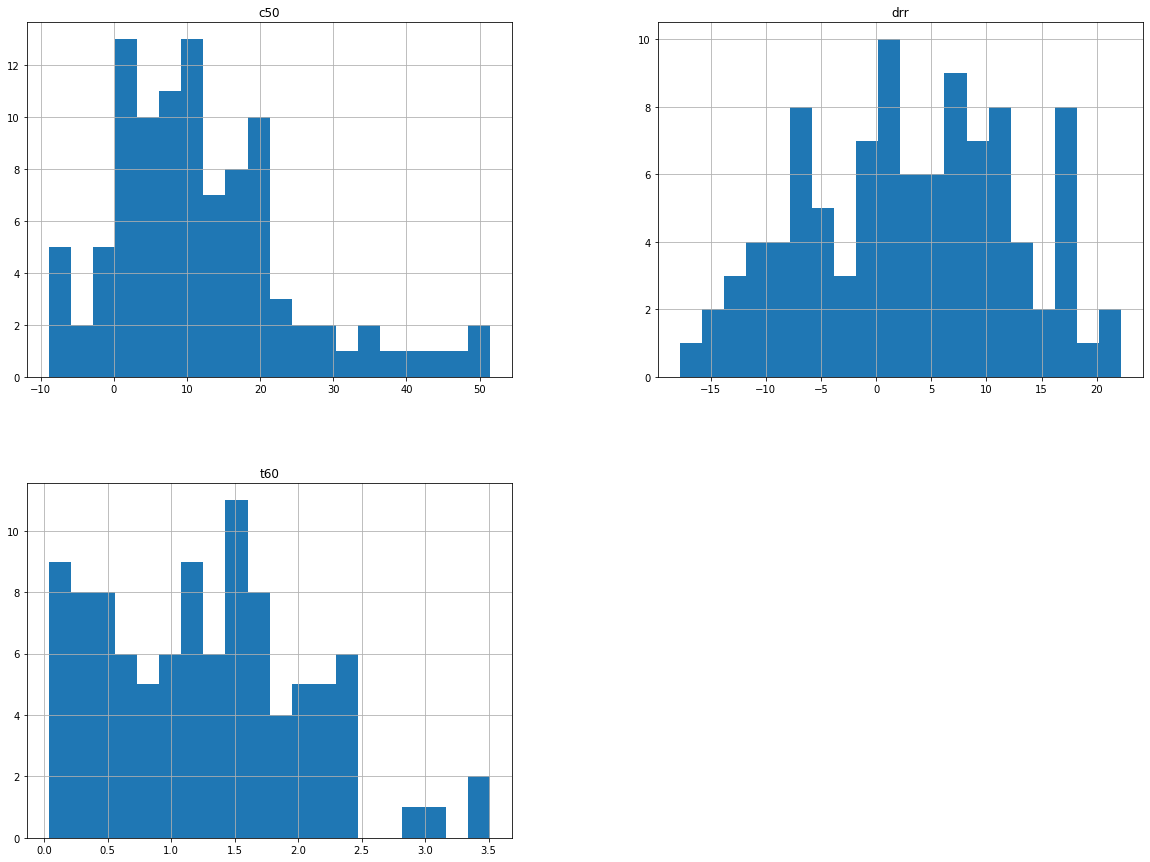

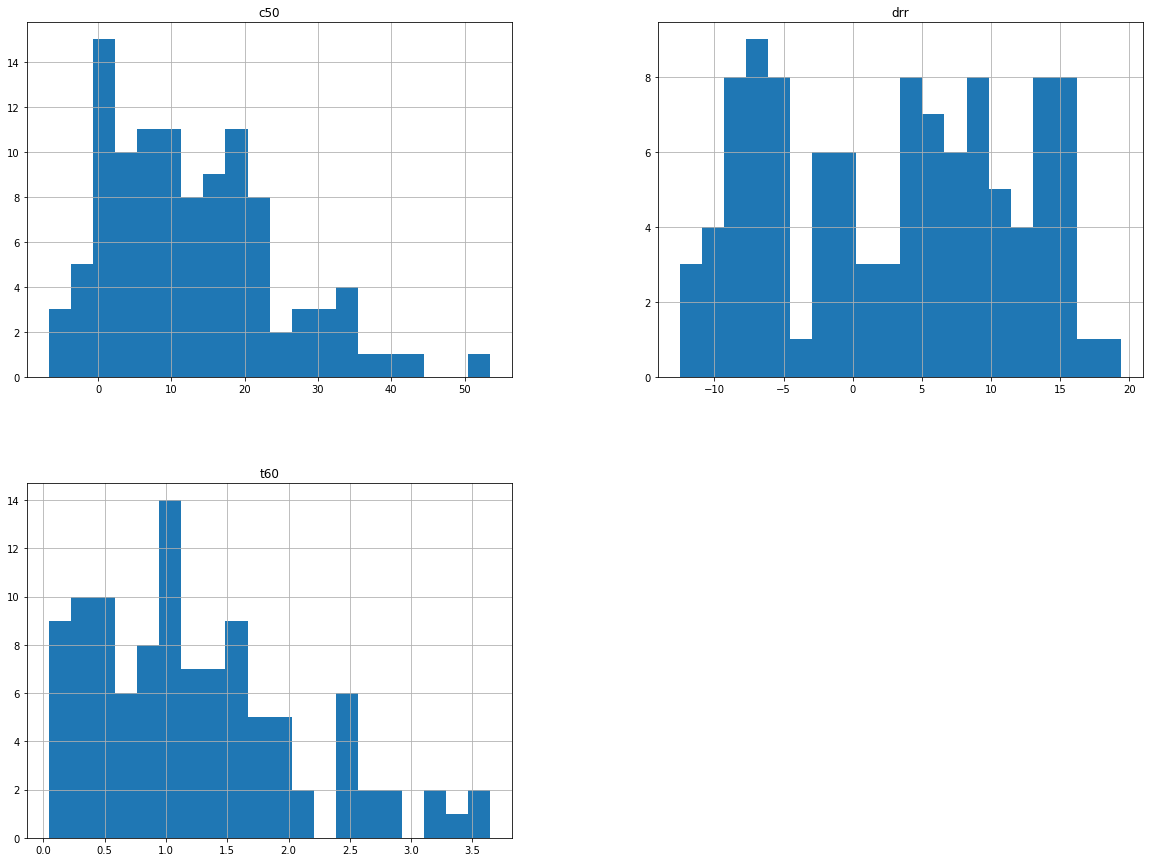

In [26]:
analyse_rir_dir('datasets/final_ds/Test/RIR_final_sr16000_c_1/')
analyse_rir_dir(rir_dir)

In [84]:
#Balance dataset

rir_high = rir_dataset[rir_dataset['t60']>1]
rir_high = rir_high[rir_high['t60']<2]
rir_very_high = rir_dataset[rir_dataset['t60']>2]
rir_very_very_high = rir_dataset[rir_dataset['t60']>3]
enhanced_very_high = rir_very_high.sample(frac=2, replace=True, random_state=1)
rir_low = rir_dataset[rir_dataset['t60']<=1]
reduced_low = rir_low.sample(frac=0.3, replace=False, random_state=1)
rir_balanced = pd.concat([reduced_low,rir_high,enhanced_very_high,rir_very_very_high])


In [98]:
list_rir_balanced = rir_balanced.RIR_name.values

In [101]:
for rir in list_rir_balanced:
    call('cp ' + rir_dir + rir + ' datasets/final_ds/balanced_rirs/',shell=True)

In [99]:
list_rir_balanced

array(['h036_Bathroom_5txts.wav', 'h238_Hallway_MITCampus_1txts.wav',
       'h027_Classroom_8txts.wav', 'h062_Campground_Dininghall_3txts.wav',
       'PabstBrewery.wav',
       'h172_Outside_EntranceOfLexingtonPublicLibrary_1txts.wav',
       'h259_Classroom_1txts.wav', 'h215_SandwichShop_1txts.wav',
       'h055_Hallway_House_3txts.wav', 'h129_Supermarket_1txts.wav',
       'h230_SuburbanBackyard_1txts.wav',
       'HumanitiesSocialSciencesCourtyard.wav', 'h067_Bar_2txts.wav',
       'CastilloDeLosTresReyesDelMorroArch.wav',
       'h021_Bedroom_102txts.wav',
       'h088_Outside_SuburbanDriveway_2txts.wav', 'h079_Bar_2txts.wav',
       'h148_Outside_StreetsOfCambridge_1txts.wav',
       'h248_Classroom_1txts.wav',
       'h266_MITCampus_StduentLounge_1txts.wav',
       'h187_Outside_StreetsOfCambridge_1txts.wav',
       'h143_Outside_StreetsOfBoston_1txts.wav',
       'h002_Bedroom_62txts.wav', 'h209_Outside_Forest_1txts.wav',
       'h208_Outside_Forest_1txts.wav', 'h258_Classroom

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f444696b550>,
      dtype=object)

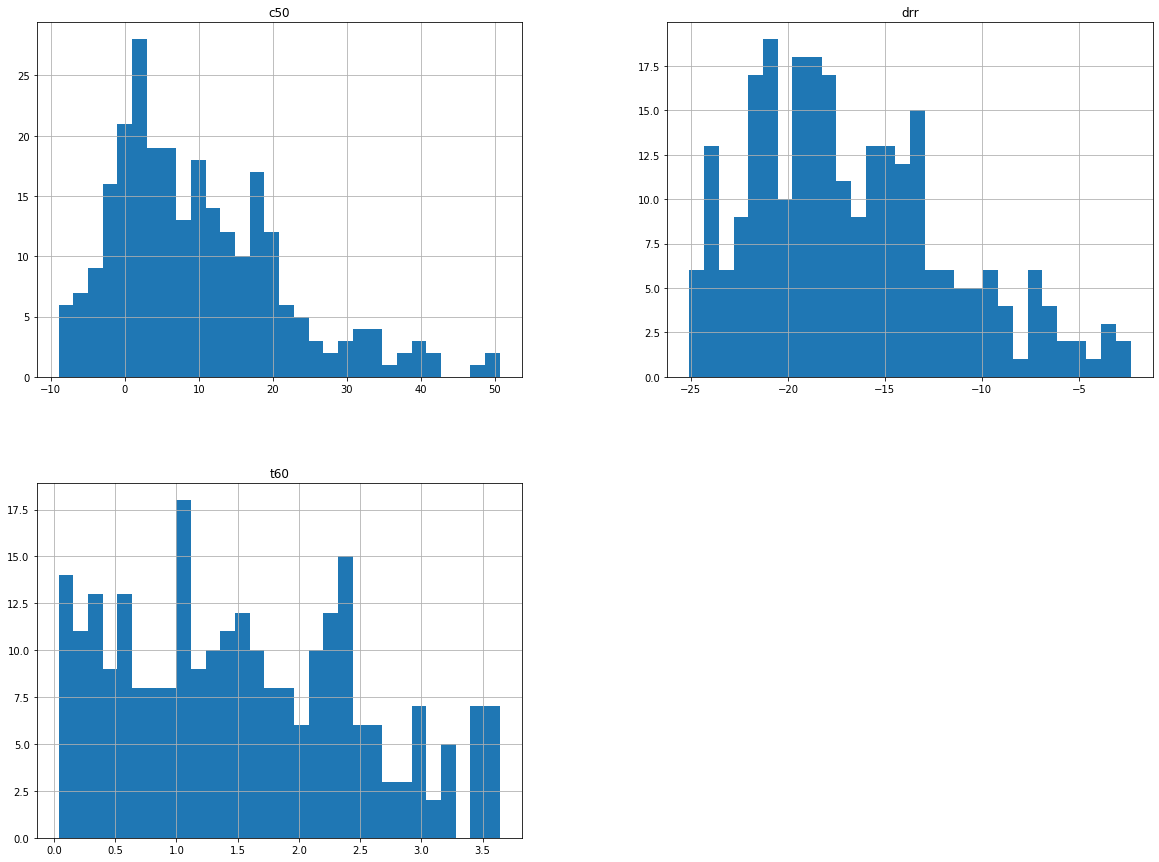

In [93]:
rir_balanced.hist(figsize=(20,15),bins=30)

In [67]:
rir_cleaned = rir_dataset[rir_dataset['t60']<4]
rir_cleaned = rir_cleaned[rir_cleaned['drr']<0]
rir_cleaned = rir_cleaned[rir_cleaned['c50']>-20]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef45c5d450>,
      dtype=object)

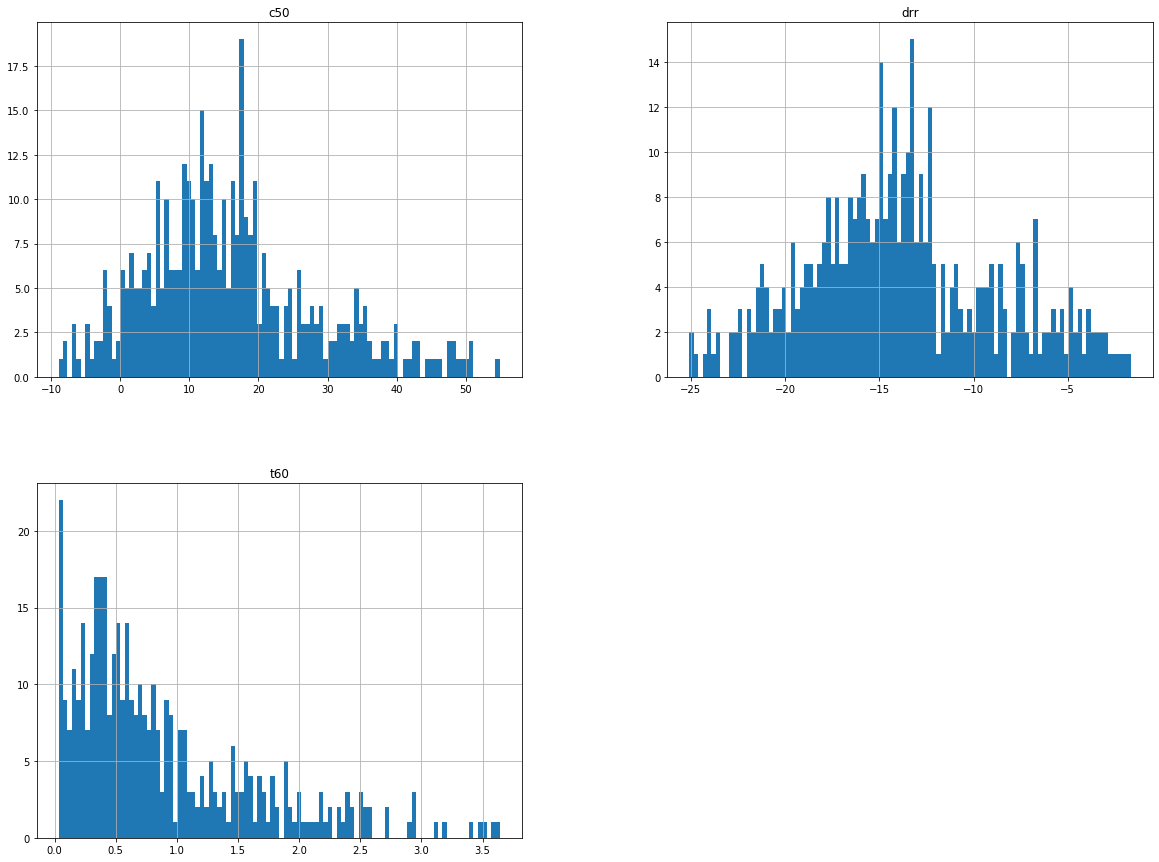

In [68]:
rir_cleaned.hist(figsize=(20,15),bins=100)

In [79]:
#Copy cleaned dataset in a new folder 
for name in rir_cleaned['RIR_name']:
    call('cp ' + str(rir_dir+(name)) + str(' RIRs/RIR_cleaned/'), shell=True)

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Meeting_Room_1_2.wav
16000 [ 4.4213831e-02 -4.8038661e-02  5.9676290e-02 ...  1.4901161e-06
 -2.0265579e-06  2.4437904e-06]


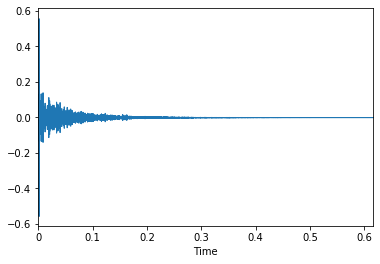

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Lecture_Room_1_2.wav
16000 [ 2.0708919e-02 -2.6707172e-02  1.0612667e-02 ...  0.0000000e+00
 -1.1146069e-05  4.1723251e-06]


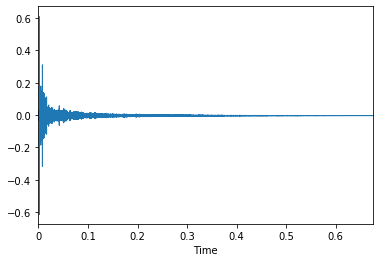

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Office_2_1.wav
16000 [-0.01029134  0.72073597 -0.14855605 ...  0.          0.
  0.        ]


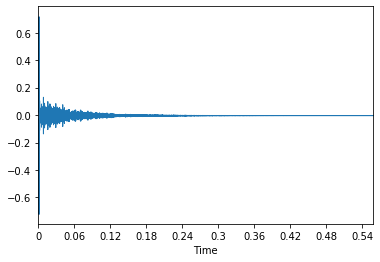

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Office_2_2.wav
16000 [ 0.2236622   0.6029557  -0.27754372 ...  0.          0.
  0.        ]


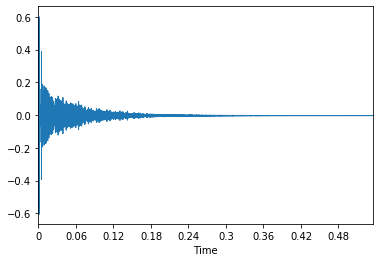

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Office_1_2.wav
16000 [ 4.5488477e-03 -3.7232637e-03 -5.2744150e-04 ...  8.1062317e-06
 -3.3915043e-05 -2.6166439e-05]


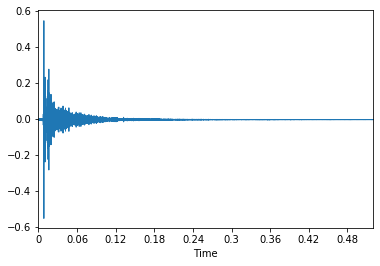

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Meeting_Room_2_1.wav
16000 [ 2.0394152e-01  4.1993219e-01 -2.2201276e-01 ...  1.0192394e-05
 -7.1525574e-06  5.4836273e-06]


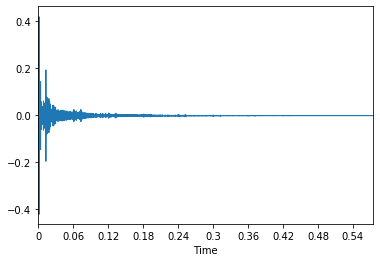

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Office_1_1.wav
16000 [-3.4438372e-03  6.7877769e-04  1.8370152e-04 ...  1.1920929e-07
 -2.9802322e-07  4.1723251e-07]


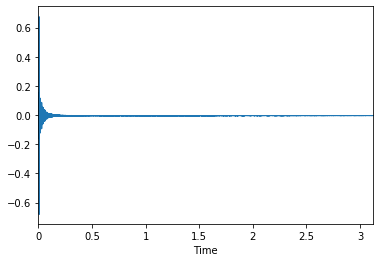

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Building_Lobby_1.wav
16000 [-2.6198387e-02  2.4374902e-02 -2.2923708e-02 ... -1.1920929e-07
  5.9604645e-08  5.9604645e-08]


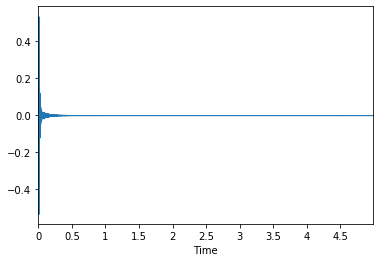

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Lecture_Room_2_2.wav
16000 [-3.1265616e-03 -1.8209219e-03 -9.0718269e-05 ...  4.0531158e-06
 -2.6822090e-06  2.0265579e-06]


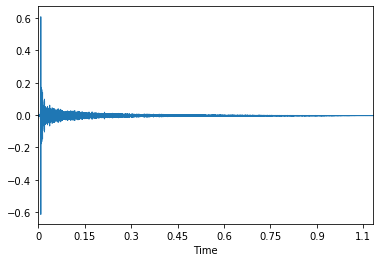

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Meeting_Room_2_2.wav
16000 [ 2.1571511e-01  4.3269545e-01 -2.3212564e-01 ... -4.1723251e-06
  2.9206276e-06 -1.8477440e-06]


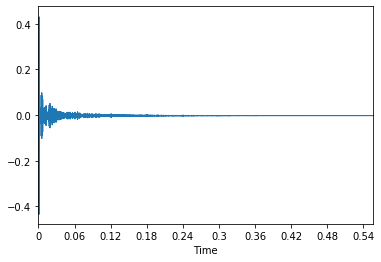

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Meeting_Room_1_1.wav
16000 [-5.7983398e-04 -6.1082840e-04 -1.6932487e-03 ...  7.3909760e-06
 -5.1259995e-06  4.0531158e-06]


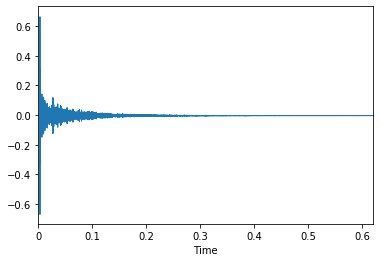

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Building_Lobby_2.wav
16000 [-0.01003087  0.01517105 -0.01763171 ...  0.          0.
  0.        ]


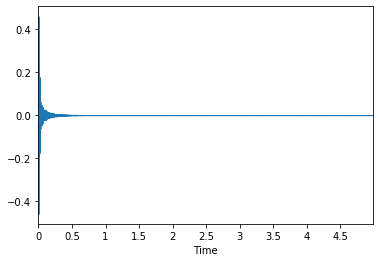

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Lecture_Room_2_1.wav
16000 [-1.9448698e-02  1.9770682e-02 -1.9389927e-02 ... -1.3709068e-06
  1.1920929e-06 -1.0728836e-06]


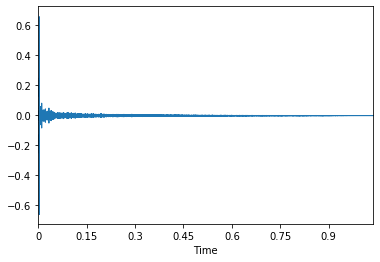

datasets/ACE_adapted/RIR_trim_sr16000_c_1/Lecture_Room_1_1.wav
16000 [ 2.2649467e-02 -2.5171101e-02  2.6967466e-02 ...  4.7087669e-06
 -3.1590462e-06  2.4437904e-06]


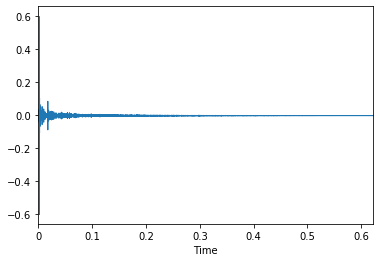

In [5]:
import glob
import librosa
from librosa import display
import matplotlib.pyplot as plt
for rir in glob.glob('datasets/ACE_adapted/RIR_trim_sr16000_c_1/*'):
    print(rir)
    fs, rir_sig = wavfile.read(rir)
    print(fs, rir_sig)
    librosa.display.waveplot(rir_sig,fs)
    plt.show()

In [9]:
glob.glob('datasets/final_ds/Train/RIR_final/*')

['datasets/final_ds/Train/RIR_final/h186_Outside_SoccerField_1txts.wav',
 'datasets/final_ds/Train/RIR_final/h036_Bathroom_5txts.wav',
 'datasets/final_ds/Train/RIR_final/TelephoneWash.wav',
 'datasets/final_ds/Train/RIR_final/CPMC264.wav',
 'datasets/final_ds/Train/RIR_final/h215_SandwichShop_1txts.wav',
 'datasets/final_ds/Train/RIR_final/h182_Hallway_MITInfiniteCorridor_1txt.wav',
 'datasets/final_ds/Train/RIR_final/creswell-crags_6_r_pinholemouth_s_pinholepath.wav',
 'datasets/final_ds/Train/RIR_final/FatMansMisery.wav',
 'datasets/final_ds/Train/RIR_final/SteinmanFoundationRecordingSuite.wav',
 'datasets/final_ds/Train/RIR_final/DipwayArch.wav',
 'datasets/final_ds/Train/RIR_final/h264_Hallway_MITCampus_1txts.wav',
 'datasets/final_ds/Train/RIR_final/h240_Classroom_1txts.wav',
 'datasets/final_ds/Train/RIR_final/Commerical_5Underpass.wav',
 'datasets/final_ds/Train/RIR_final/WalkwayUnderECampusDr.wav',
 'datasets/final_ds/Train/RIR_final/h230_SuburbanBackyard_1txts.wav',
 'dataset